In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('input/peppers.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('input/dolphin.png', cv2.IMREAD_COLOR)
img3 = cv2.imread('input/vivek.jpeg', cv2.IMREAD_GRAYSCALE)

img1 = img1[:,:,::-1]




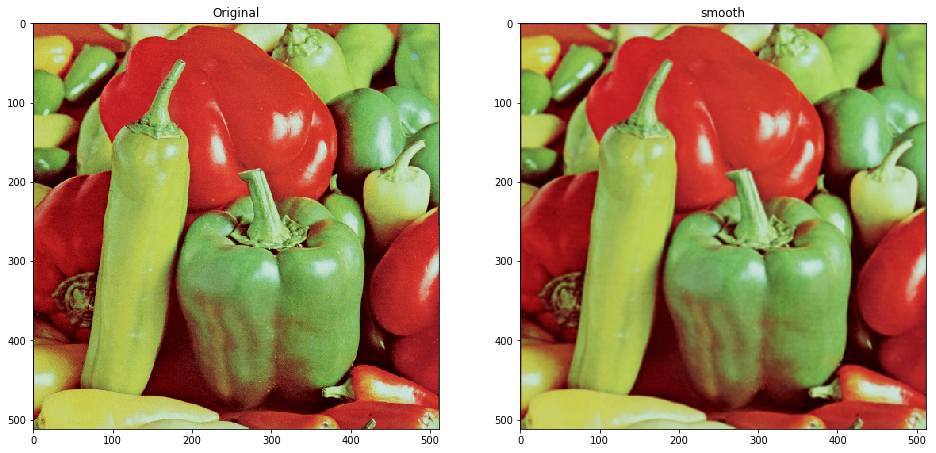

In [13]:
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img1,-1,kernel)

plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img1),plt.title('Original')
plt.subplot(122),plt.imshow(dst),plt.title('smooth')
plt.show()


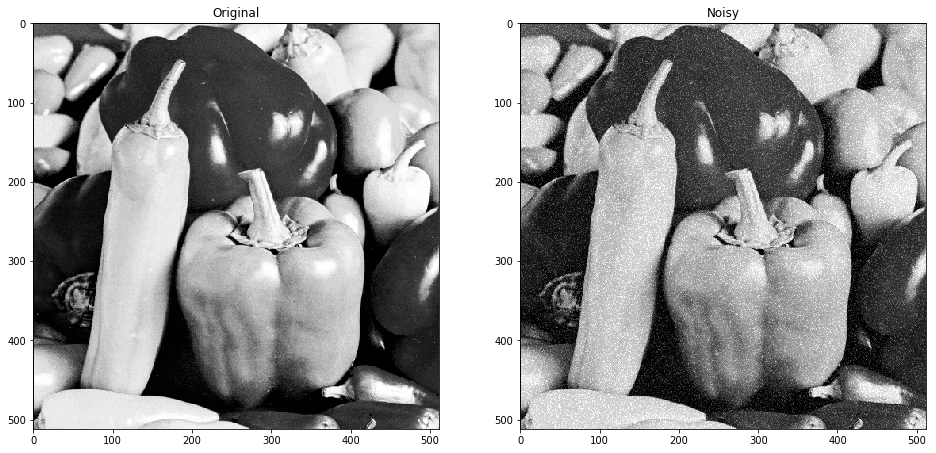

In [14]:
imgGreen = img1[:,:,1]
height, width = imgGreen.shape
    
noise = np.zeros((height,width), np.uint8)



# Meaning: cv2.randn(dst, mean, stddev)
cv2.randn(noise, 0, 30)
imgGreenNoise = cv2.add(imgGreen,noise)

plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(imgGreen, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(imgGreenNoise, cmap='gray'),plt.title('Noisy')
plt.show()



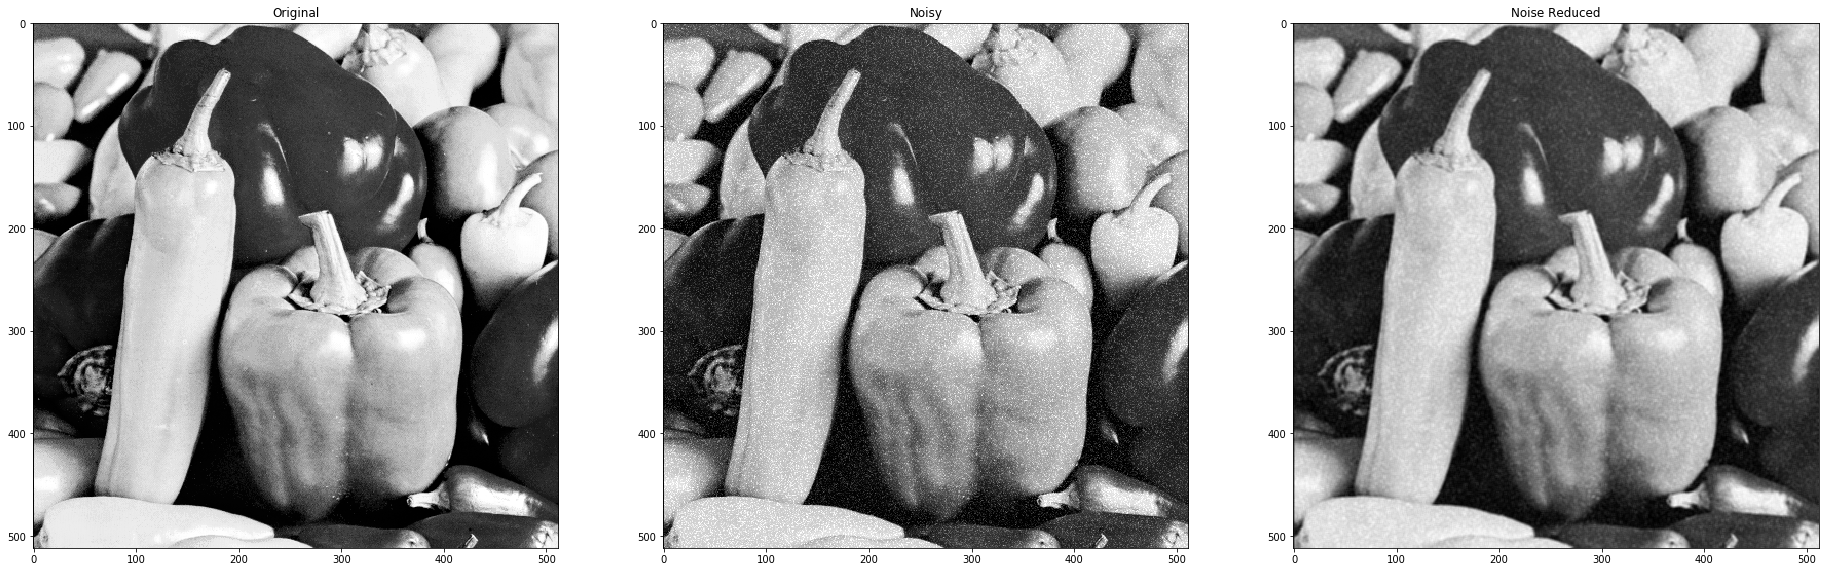

In [15]:

noiseReduced = cv2.filter2D(imgGreenNoise,-1,kernel)

plt.figure(figsize=(32, 32))
plt.subplot(131),plt.imshow(imgGreen, cmap='gray'),plt.title('Original')
plt.subplot(132),plt.imshow(imgGreenNoise, cmap='gray'),plt.title('Noisy')
plt.subplot(133),plt.imshow(noiseReduced, cmap='gray'),plt.title('Noise Reduced')

plt.show()

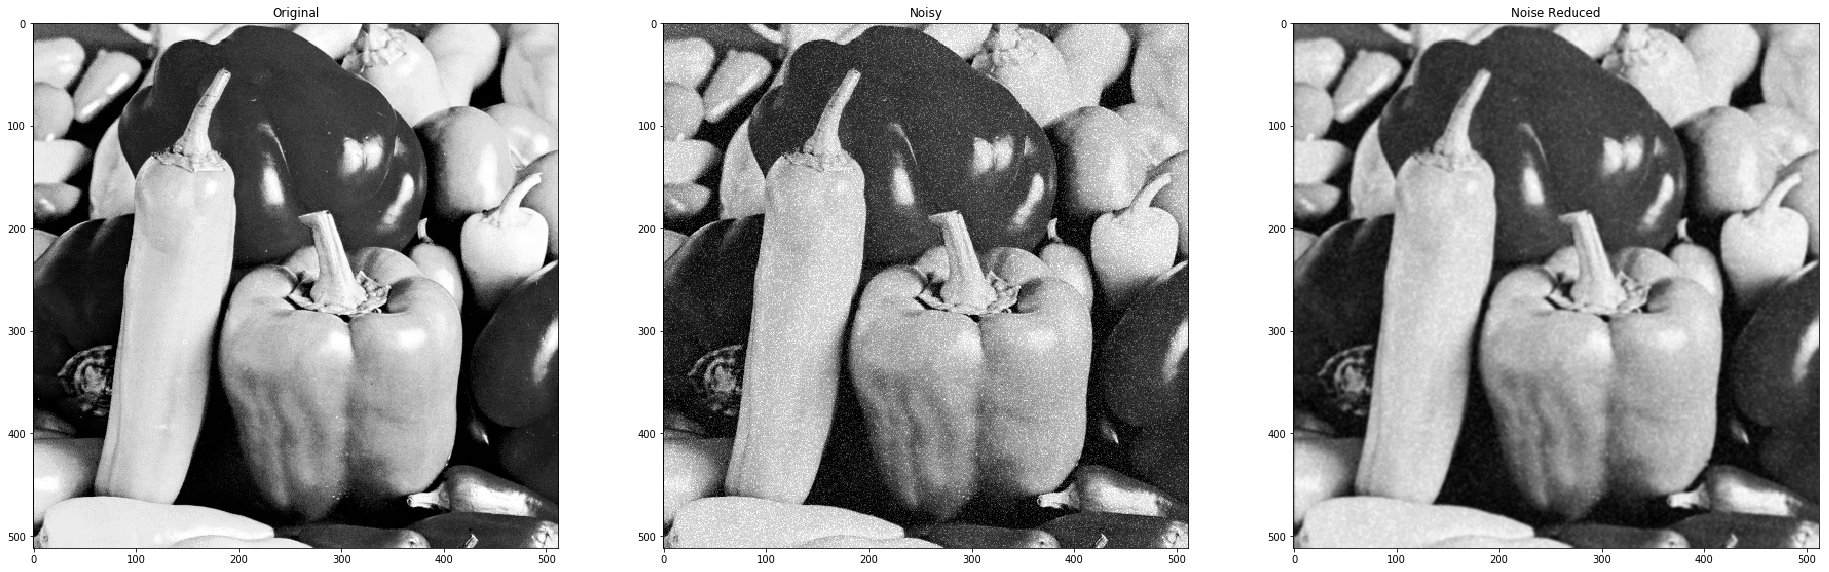

In [16]:


noiseReducedGaussianBlur = cv2.GaussianBlur(imgGreenNoise,(5,5),0)

plt.figure(figsize=(32, 32))
plt.subplot(131),plt.imshow(imgGreen, cmap='gray'),plt.title('Original')
plt.subplot(132),plt.imshow(imgGreenNoise, cmap='gray'),plt.title('Noisy')
plt.subplot(133),plt.imshow(noiseReducedGaussianBlur, cmap='gray'),plt.title('Noise Reduced')

plt.show()

## Box Filter vs. Gaussian Filter performacee

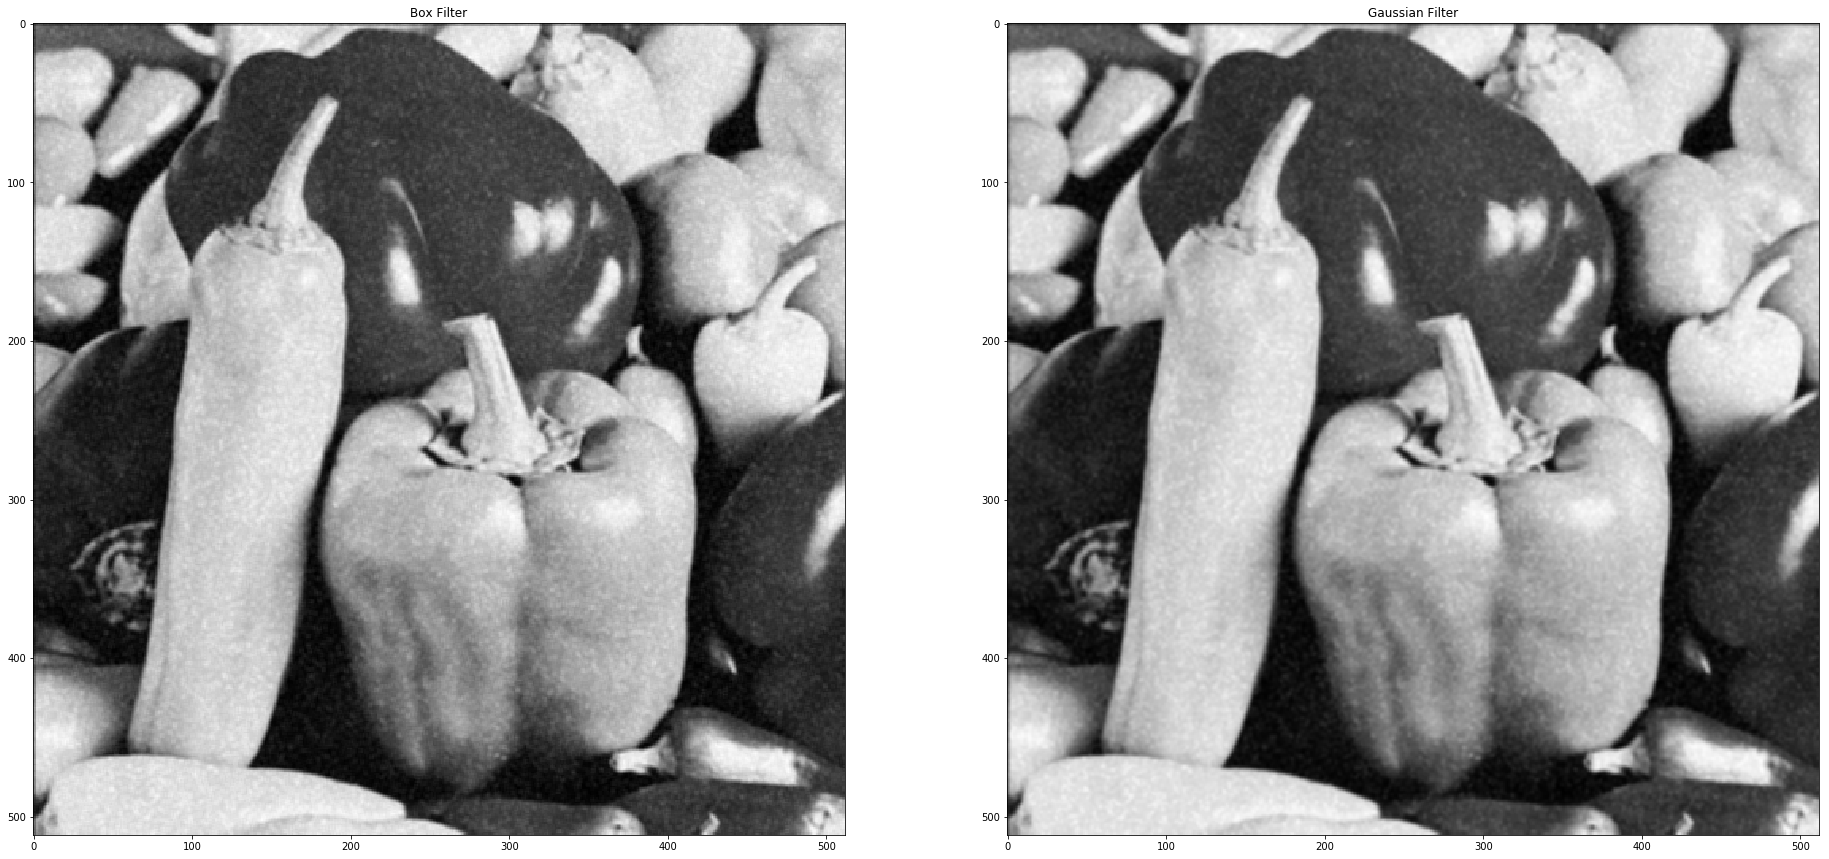

In [17]:
plt.figure(figsize=(32, 32))
plt.subplot(121),plt.imshow(noiseReduced, cmap='gray'),plt.title('Box Filter')
plt.subplot(122),plt.imshow(noiseReducedGaussianBlur, cmap='gray'),plt.title('Gaussian Filter')

plt.show()

## Creating a Gaussian Filter 

In [18]:
gaussian = cv2.getGaussianKernel(5,1)
print(gaussian)
print(gaussian.shape)


filter1 = np.dot(gaussian, gaussian.T)





[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]
(5, 1)


In [19]:
np.sum(gaussian)

0.9999999999999999

Creating a Gaussian Filter and Plotting the filter. Ideally, size of the filter should be larger than the sigma

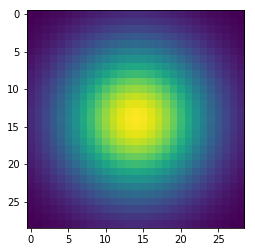

In [20]:
cutoff_frequency = 7
filterX = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filterY = filterX.copy()

filter = np.dot(filterX, filterX.T)

# let's take a look at the filter!
plt.figure(figsize=(4,4))
plt.imshow(filter)
plt.show()




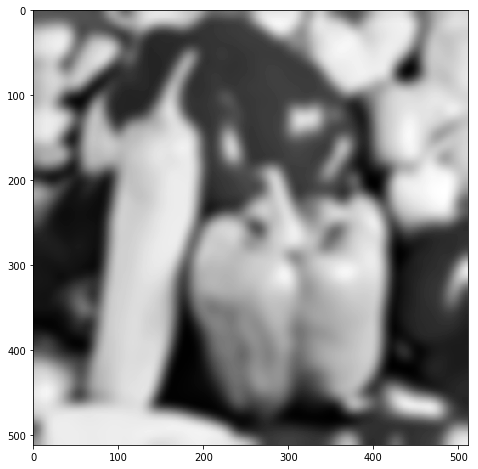

In [21]:
blur = cv2.filter2D(imgGreen, -1, filter)
plt.figure(figsize=(8, 8))
plt.imshow((blur).astype(np.uint8),cmap='gray')
plt.show()

In [22]:
## Using Seperable Filter. here filterX is applied first, and then filterY.  

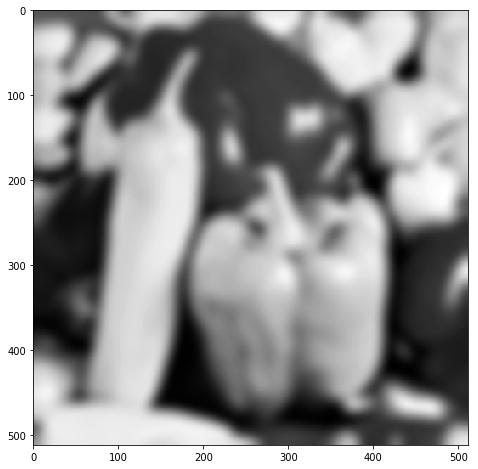

In [23]:
blur1 = cv2.sepFilter2D(imgGreen,-1,filterX, filterY)
plt.figure(figsize=(8, 8))
plt.imshow(blur1, cmap='gray')
plt.show()

In [24]:
imgCat = cv2.imread('input/data/cat.bmp', cv2.IMREAD_COLOR)
imgDog = cv2.imread('input/data/dog.bmp', cv2.IMREAD_COLOR)


# Project 1. Various Numpy Methods

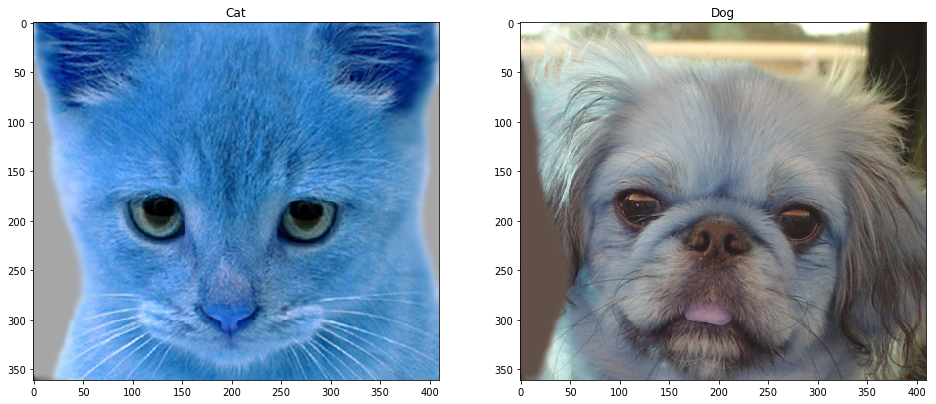

In [25]:
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(imgCat),plt.title('Cat')
plt.subplot(122),plt.imshow(imgDog),plt.title('Dog')
plt.show()


In [26]:
a = np.arange(16).reshape(4,4)

In [27]:
print (a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [28]:
aa = np.pad(a,(1,1),'reflect' )
print(aa)

[[ 5  4  5  6  7  6]
 [ 1  0  1  2  3  2]
 [ 5  4  5  6  7  6]
 [ 9  8  9 10 11 10]
 [13 12 13 14 15 14]
 [ 9  8  9 10 11 10]]


In [29]:
b = np.clip(a, 4,10)
print(b)

[[ 4  4  4  4]
 [ 4  5  6  7]
 [ 8  9 10 10]
 [10 10 10 10]]


In [30]:
np.multiply(a, b)

array([[  0,   4,   8,  12],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 110],
       [120, 130, 140, 150]])

In [31]:
np.sum(a)

120

In [32]:
15*16/2

120.0

# Edge Detection

In [33]:
edges = cv2.Canny(img1,100,200)

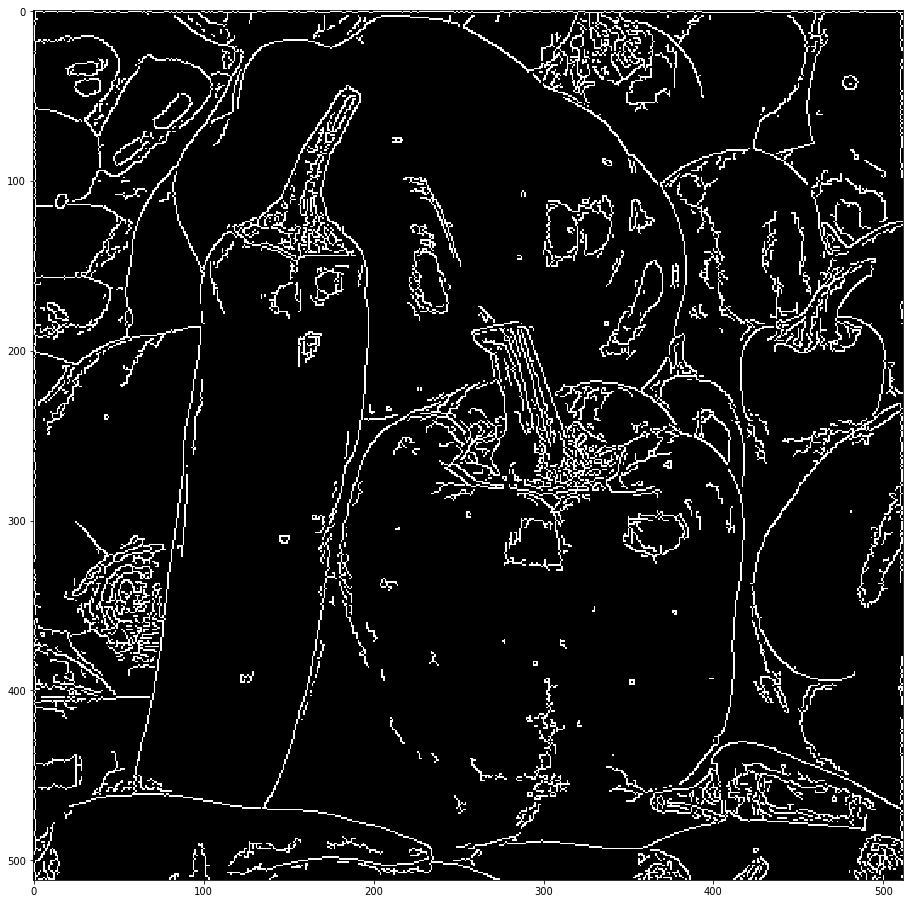

In [34]:
edges = cv2.Canny(img1,100,200)


plt.figure(figsize=(16, 16))
plt.imshow(edges,cmap='gray')
plt.show()


# Template Matching
